In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
import pickle

In [2]:
from scipy.optimize import curve_fit as cf

In [3]:
%matplotlib notebook

In [4]:
N=256
kB=1
J=1

In [5]:
def E(s):
    return -J*(np.sum(s[:N-1]*s[1:])+s[0]*s[N-1])

In [7]:
def get_ensemble_avg(T,N_steps,N_ensemble):
    Sum_m=np.zeros(N_steps)
    Sum_E=np.zeros(N_steps)
    
    for i in range(N_ensemble):
        state=np.ones(N)
        m_arr,E_arr=MC_update(T,state,N_steps)
        Sum_m=Sum_m+m_arr
        Sum_E=Sum_E+E_arr
    return Sum_m/N_ensemble,Sum_E/N_ensemble

In [8]:
def MC_update(T,state,N_steps):
    beta=1/T #k_B=1
    m_arr=np.ones(N_steps)
    E_arr=np.ones(N_steps)*(-N)
    j=0
    while(j<N_steps-1):
        i=np.random.randint(N) #flip position
        r=np.random.random()
        
        delE=2*J*state[i]*(state[(i+1)%N]+state[i-1])
        
        if delE<0 or r<np.exp(-beta*delE):
            m_arr[j+1]=m_arr[j]-2*state[i]/N
            E_arr[j+1]=E_arr[j]+delE
            state[i]=-state[i]
        else:
            m_arr[j+1]=m_arr[j]
            E_arr[j+1]=E_arr[j]
        j=j+1
    return m_arr,E_arr

In [9]:
def generate_spin_data(T,N_eq,N_ensemble,fpath):
    beta=1/T
    state=np.ones(N)
    #state_arr=[]
    m_arr=np.zeros(N_ensemble)
    E_arr=np.zeros(N_ensemble)
    m=1
    E=-N
    
    
    for j in range(N_eq):
        i=np.random.randint(N) #flip position
        r=np.random.random()
        
        delE=2*J*state[i]*(state[(i+1)%N]+state[i-1])
        
        if delE<0 or r<np.exp(-beta*delE):
            m=m-2*state[i]/N
            E=E+delE
            state[i]=-state[i]
            
    
    for j in range(N_ensemble):
        i=np.random.randint(N) #flip position
        r=np.random.random()
        
        delE=2*J*state[i]*(state[(i+1)%N]+state[i-1])
        
        if delE<0 or r<np.exp(-beta*delE):
            m=m-2*state[i]/N
            E=E+delE
            state[i]=-state[i]
        m_arr[j]=m
        E_arr[j]=E
        
    data_dict={"T":T,"m_arr":m_arr,"E_arr":E_arr}
    with open(fpath, "wb") as file:
        pickle.dump(data_dict, file)
    

In [10]:
def func(x,a):
    return np.exp(-a*x)

In [11]:
init_state=np.ones(N)

In [53]:
T_arr=[1,1.5,2,2.5,3,3.5,4]

<IPython.core.display.Javascript object>


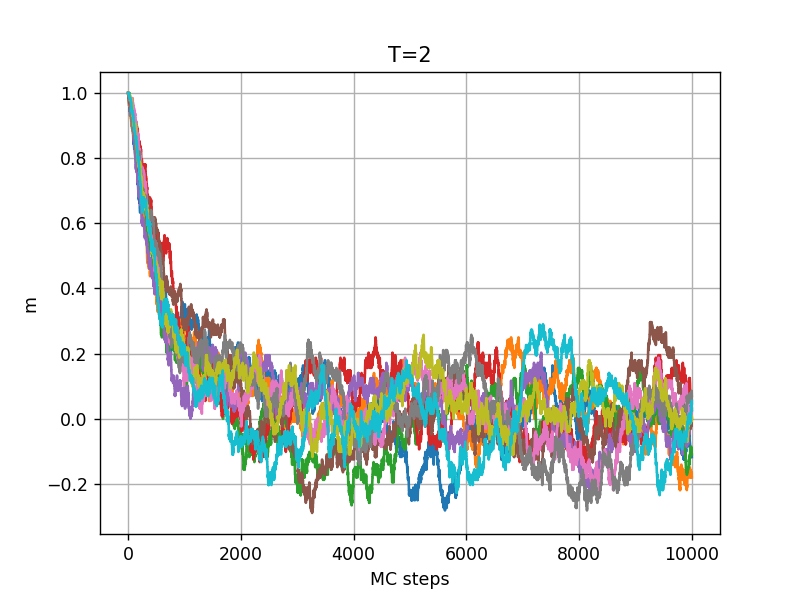

Text(0, 0.5, 'm')

In [56]:
T=2
for i in range(10):
    m_arr=get_ensemble_avg(T,10000,1)[0]
    xrange=range(1,10001)
    plt.plot(xrange,m_arr,label=r'T={T}'.format(T=T))
plt.grid()
plt.xlabel('MC steps')
plt.ylabel('m')

In [57]:
plt.title("T=2")

Text(0.5, 1.0, 'T=2')

In [23]:
plt.legend()

In [27]:
tau_arr=[]

C:\Users\saumy\AppData\Local\Temp/ipykernel_20052/3945788442.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-a*x)


<IPython.core.display.Javascript object>


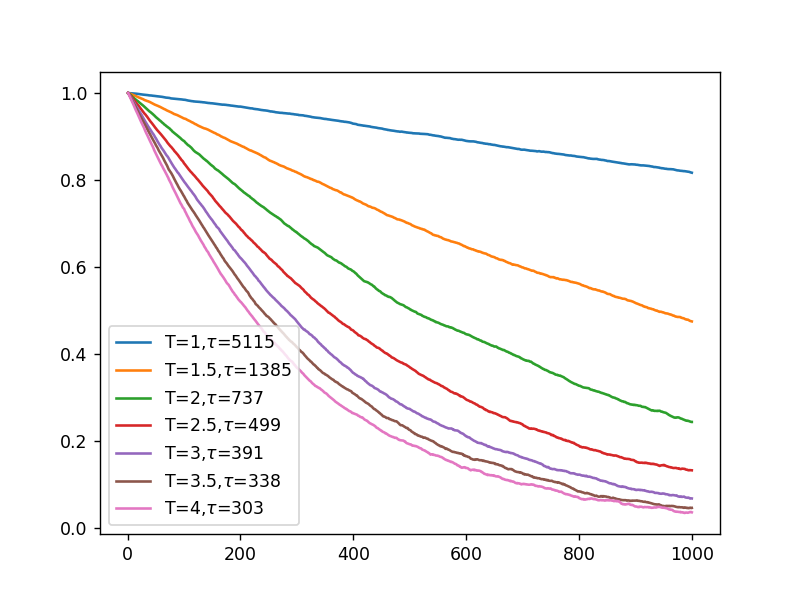

C:\Users\saumy\AppData\Local\Temp/ipykernel_20052/3945788442.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-a*x)
C:\Users\saumy\AppData\Local\Temp/ipykernel_20052/3945788442.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-a*x)
C:\Users\saumy\AppData\Local\Temp/ipykernel_20052/3945788442.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-a*x)
C:\Users\saumy\AppData\Local\Temp/ipykernel_20052/3945788442.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-a*x)
C:\Users\saumy\AppData\Local\Temp/ipykernel_20052/3945788442.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-a*x)
C:\Users\saumy\AppData\Local\Temp/ipykernel_20052/3945788442.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-a*x)


In [28]:
for T in T_arr:
    m_arr=get_ensemble_avg(T,1000,200)[0]
    xrange=range(1,1001)
    popt,pcov=cf(func,xrange,m_arr)
    a=popt[0]
    tau=int(1/a)
    tau_arr.append(tau)
    plt.plot(xrange,m_arr,label=r'T={T},$\tau$={tau}'.format(T=T,tau=tau))
plt.legend()

<IPython.core.display.Javascript object>


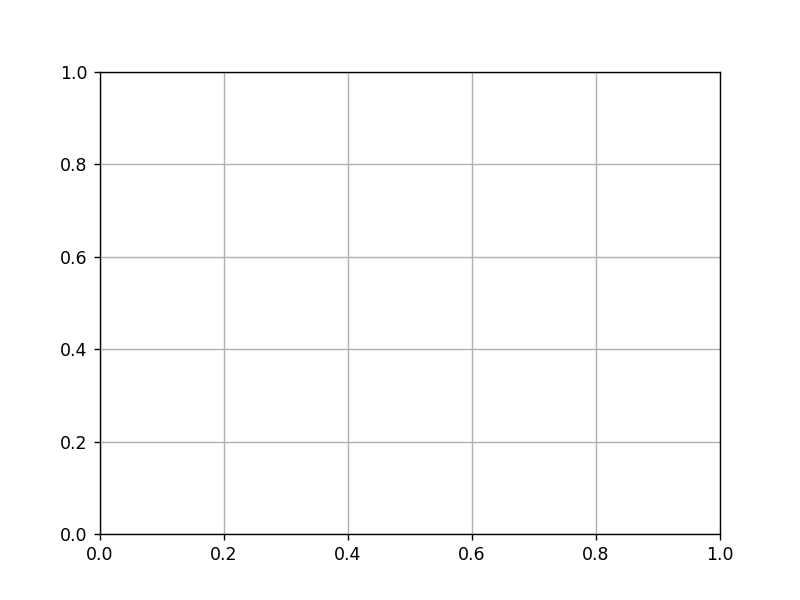

In [15]:
plt.grid()

In [14]:
plt.xlabel("MC steps")
plt.ylabel("m")

Text(53.402777777777786, 0.5, 'm')

In [29]:
tau_arr

[5115, 1385, 737, 499, 391, 338, 303]

In [30]:
eq_time_arr=np.array(tau_arr)*15

In [31]:
eq_time_arr

array([76725, 20775, 11055,  7485,  5865,  5070,  4545])

In [57]:
generate_spin_data(T_arr[1],eq_time_arr[1],500000,f"T={T_arr[1]}")

In [34]:
with open(f"T={T_arr[1]}","rb") as file:
    data_dict=pickle.load(file)
    T=data_dict["T"]
    m_arr=data_dict["m_arr"]
    E_arr=data_dict["E_arr"]
    
    print(np.mean(E_arr),np.var(E_arr)/T**2)

-148.897272 75.93047775911822


In [35]:
T_arr=np.arange(1,5.2,0.2)

In [43]:
j=0
Numerical_Cv_arr=[]
Theoretical_Cv_arr=[]
Numerical_m_arr=[]

Numerical_E_arr=[]
Theoretical_E_arr=[]

for T in T_arr:
    #generate_spin_data(T_arr[j],80000,3000000,f"T={T_arr[j]}")
    with open(f"C:/Users/saumy/OneDrive/Desktop/ISING_1D/FINAL/T={T_arr[j]}","rb") as file:
        data_dict=pickle.load(file)
        E_arr=data_dict["E_arr"]
        m_arr=data_dict["m_arr"]
        
        Numerical_Cv_arr.append(np.var(E_arr)/T**2)
        Numerical_E_arr.append(np.mean(E_arr))
        Numerical_m_arr.append(np.mean(m_arr))
        
        Theoretical_E_arr.append(-N*np.tanh(1/T))
        Theoretical_Cv_arr.append(N*(1-(np.tanh(1/T))**2)/T**2)
    j=j+1


<IPython.core.display.Javascript object>


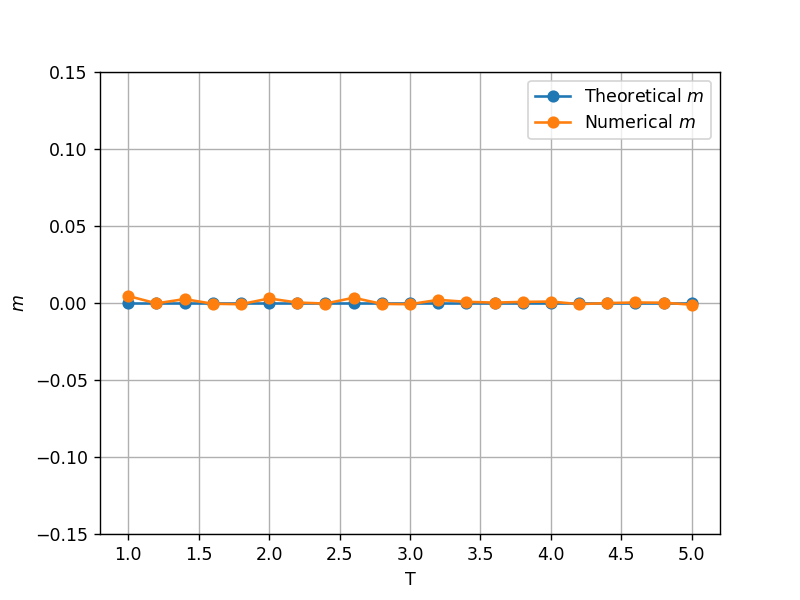

Text(0, 0.5, '$m$')

In [52]:
#plt.plot(T_arr,Theoretical_m_arr,marker='o',label=r'Theoretical $C_v$')
plt.plot(T_arr,T_arr*0,marker='o',label=r'Theoretical $m$')
plt.plot(T_arr,Numerical_m_arr,marker='o',label=r'Numerical $m$')
plt.legend()
plt.grid()
plt.ylim(-.15,.15)
plt.xlabel('T')
plt.ylabel(r'$m$')

In [75]:
def get_corr_func(T,N_eq,N_ensemble):
    state=np.ones(N)
    beta=1/T
    Corr_arr=np.zeros(15)
    
    for j in range(N_eq):
        i=np.random.randint(N) #flip position
        r=np.random.random()
        
        delE=2*J*state[i]*(state[(i+1)%N]+state[i-1])
        
        if delE<0 or r<np.exp(-beta*delE):
            state[i]=-state[i]
    
    for j in range(N_ensemble):
        i=np.random.randint(N) #flip position
        r=np.random.random()
        
        delE=2*J*state[i]*(state[(i+1)%N]+state[i-1])
        
        if delE<0 or r<np.exp(-beta*delE):
            state[i]=-state[i]
        
        k=0
        while k<15:
            for kk in range(N):
                Corr_arr[k]=Corr_arr[k]+state[kk]*state[(kk+k)%N]
            k=k+1
    return np.abs(Corr_arr)/(N_ensemble*N)

<IPython.core.display.Javascript object>


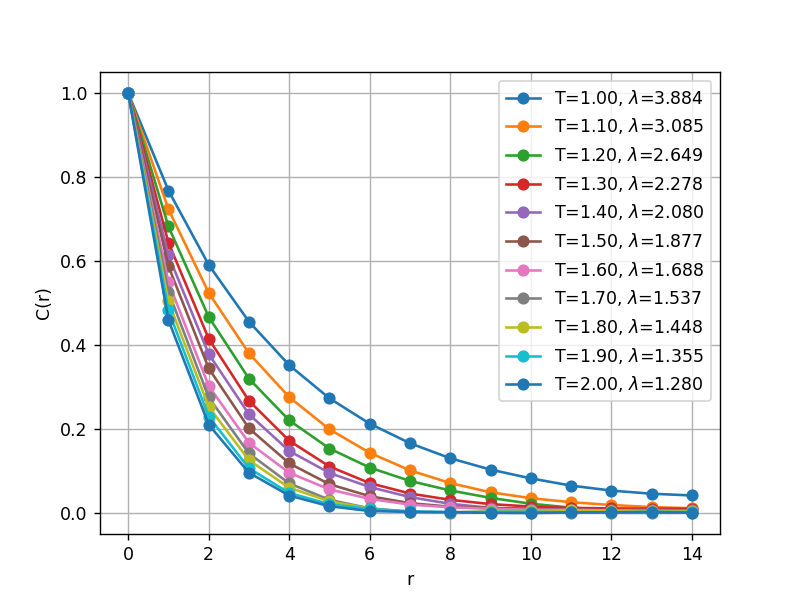

In [115]:
xrange=range(15)
T_arr=np.arange(1,2.1,0.1)
Lambda_arr=[]
for T in T_arr:
    Corr_arr=get_corr_func(T,80000,300000)
    popt,pcov=cf(func,xrange,Corr_arr)
    Lambda=1/popt[0]
    plt.plot(xrange,Corr_arr,marker='o',label=r'T={T:.2f}, $\lambda$={l:.3f}'.format(T=T,l=Lambda))
    Lambda_arr.append(Lambda)
plt.legend()

In [116]:
plt.grid()

In [117]:
plt.xlabel('r')
plt.ylabel('C(r)')

Text(0, 0.5, 'C(r)')

<IPython.core.display.Javascript object>


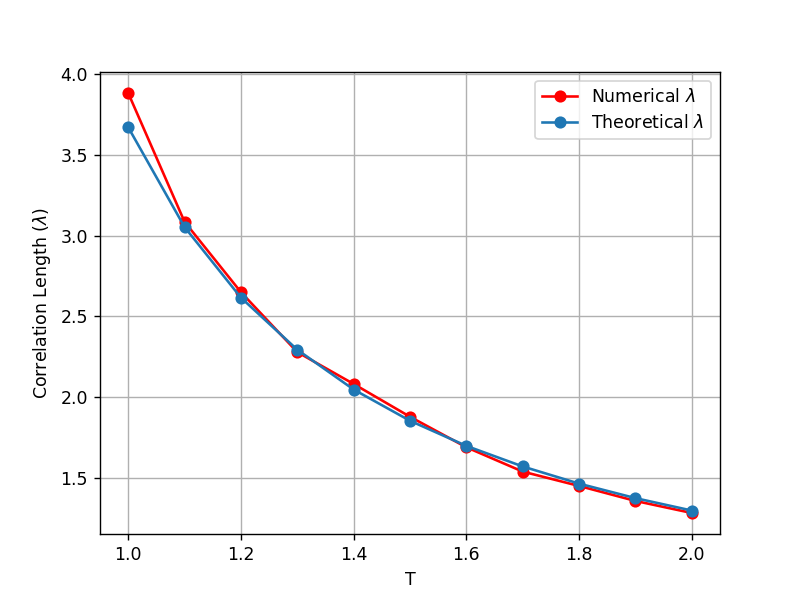

In [121]:
plt.plot(T_arr,Lambda_arr,marker='o',c='r',label=r'Numerical $\lambda$')
plt.plot(T_arr,1/np.abs(np.log(np.tanh(1/T_arr))),marker='o',label=r'Theoretical $\lambda$')
plt.grid()
plt.xlabel('T')
plt.ylabel(r'Correlation Length ($\lambda$)')
plt.legend()